#Necessary Imports

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [109]:
import warnings
warnings.filterwarnings('ignore')

#Read Data

In [110]:
train_df = pd.read_csv("/content/drive/MyDrive/credit card fraud/fraudTrain.csv")
test_df = pd.read_csv("/content/drive/MyDrive/credit card fraud/fraudTest.csv")
print(train_df.shape)
print(test_df.shape)

(1296675, 23)
(555719, 23)


In [111]:
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [112]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [113]:
train_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [114]:
features = ['trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long']
labels = ['is_fraud']

In [115]:
#Training Dataset
X_train = train_df[features]
y_train = train_df[labels]

#Testing Dataset
X_test = test_df[features]
y_test = test_df[labels]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1296675, 21) (1296675, 1) (555719, 21) (555719, 1)


#Data Visualization and Relations

In [116]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 21 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [117]:
#check if there is any null valued features or not
X_train.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
dtype: int64

In [118]:
def preprocess_data(X):
  irrelevent_columns = ['merchant','first','last','street','zip','unix_time','trans_num','cc_num']
  X = X.drop(columns = irrelevent_columns)
  #Extract date from trans_date_trans_time feture
  X['trans_date_trans_time'] = pd.to_datetime(X['trans_date_trans_time'])
  X['trans_date'] = X['trans_date_trans_time'].dt.strftime('%d-%m-%Y')
  X['trans_date'] = pd.to_datetime(X['trans_date'])
  #format date of birth as per date of transaction
  X['dob'] = pd.to_datetime(X['dob'])
  X['dob'] = X['dob'].dt.strftime('%d-%m-%Y')
  X['dob'] = pd.to_datetime(X['dob'])
  #Find The current age of the holder
  X["age"] = (X["trans_date"] - X["dob"]).dt.days//365
  X['trans_month'] = X['trans_date'].dt.month
  X['trans_year'] = X['trans_date'].dt.year
  #Converting catagorical feature gender to numeric class
  X['gender'] = X['gender'].apply(lambda x : 1 if x == 'M' else 0)
  X['gender'] = X['gender'].astype(int)
  #distance from merchant to the customer
  X['lat_dis'] = abs(X['lat'] - X['merch_lat'])
  X['long_dis'] = abs(X['long'] - X['merch_long'])
  X = X.drop(columns=['category', 'city','trans_date_trans_time','state','job','merch_lat','merch_long','lat','long','dob','trans_date'])
  return X

In [119]:
#Shapes of Data before feature Extraction
print("Training Set Size = ", X_train.shape)
print("Testing Set Size = ", X_test.shape)

Training Set Size =  (1296675, 21)
Testing Set Size =  (555719, 21)


In [120]:
X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

In [121]:
#Shapes of Data after feature Extraction
print("Training Set Size = ", X_train.shape)
print("Testing Set Size = ", X_test.shape)

Training Set Size =  (1296675, 8)
Testing Set Size =  (555719, 8)


In [122]:
X_feat_label = X_train.copy()
X_feat_label['is_fraud'] = y_train
X_feat_label.head()

,amt,gender,city_pop,age,trans_month,trans_year,lat_dis,long_dis,is_fraud
0,4.97,0,3495,30,1,2019,0.067507,0.870215,0
1,107.23,0,149,40,1,2019,0.271247,0.024038,0
2,220.11,1,4154,56,1,2019,0.969904,0.107519,0
3,45.00,1,1939,51,1,2019,0.803731,0.447271,0
4,41.96,1,99,32,1,2019,0.254299,0.830441,0


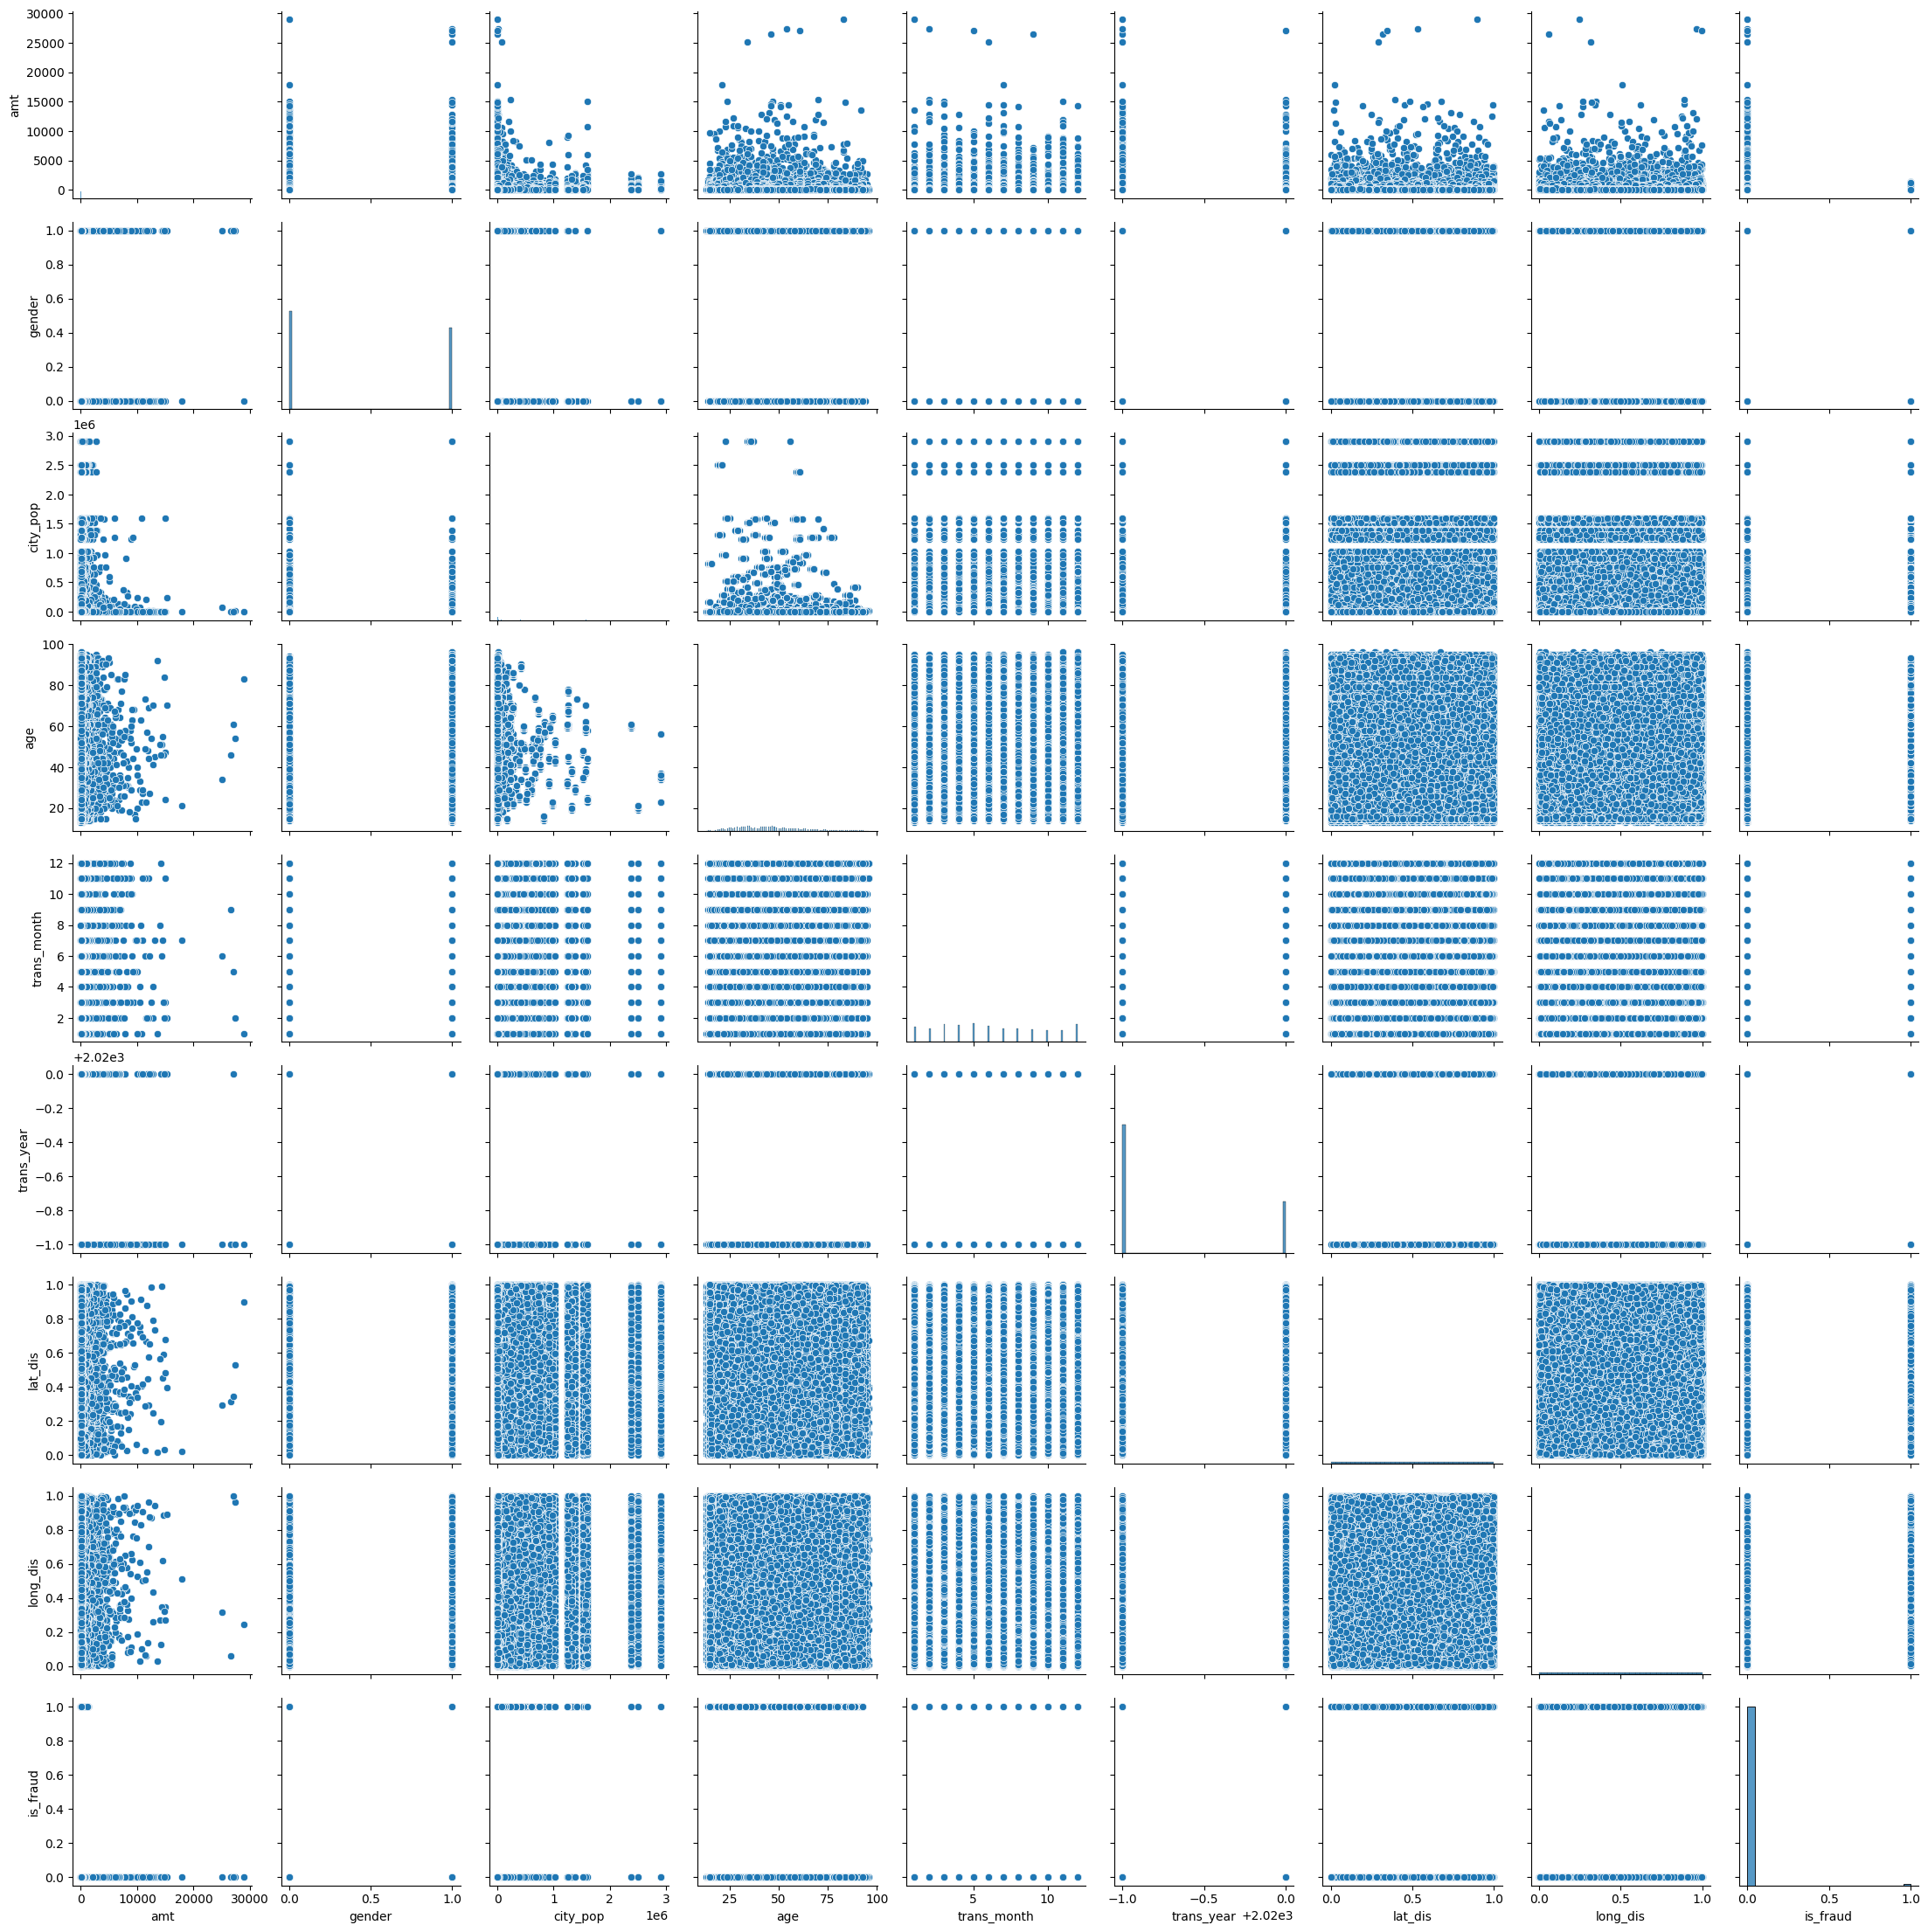

In [123]:
sns.pairplot(X_feat_label)
plt.show()

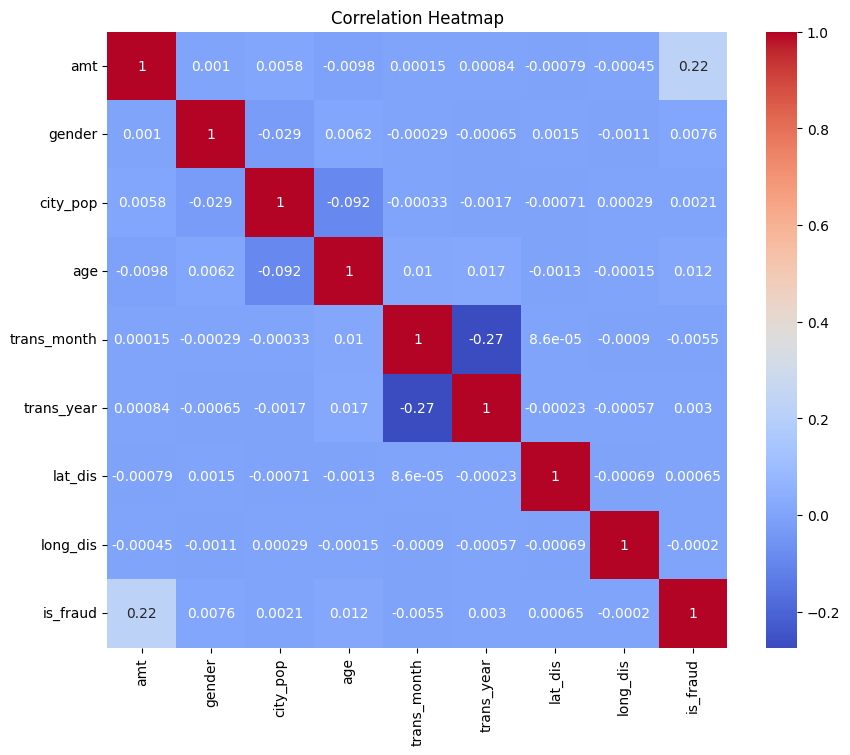

In [124]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = X_feat_label.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [125]:
X_train.columns

Index(['amt', 'gender', 'city_pop', 'age', 'trans_month', 'trans_year',
       'lat_dis', 'long_dis'],
      dtype='object')

In [126]:
X_train.shape

(1296675, 8)

In [128]:
# Step 1: Fit the StandardScaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

#Training Model using Logistic Regression

In [129]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

###Evaluating Logistic Regression model prediction over test set

In [138]:
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of Logistic Regression model over test set is : ", '%.2f' %(accuracy * 100), '%')

The accuracy of Logistic Regression model over test set is :  99.55 %


### Classification Report for Logistic Regression

In [144]:
print(classification_report(y_test, y_pred))

<function print>

#Training Model using Decision tree Classifier

In [137]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier()

### Evaluating Decision Tree Classifier model prediction over test set

In [142]:
y_pred_d = decision_tree.predict(X_test)
accuracy_d = accuracy_score(y_test, y_pred_d)
print("The accuracy of Decision Tree Classifier model over test set is : ", '%.2f' %(accuracy_d * 100), '%')

The accuracy of Decision Tree Classifier model over test set is :  99.29 %


### Classification Report for Decision Tree

In [145]:
print(classification_report(y_test, y_pred_d))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.20      0.29      0.24      2145

    accuracy                           0.99    555719
   macro avg       0.60      0.64      0.62    555719
weighted avg       0.99      0.99      0.99    555719



#Training Model using Random Forest

In [143]:
random_forest = RandomForestClassifier(random_state=1,n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### Evaluate Random Forest model prediction over Test set

In [148]:
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("The accuracy of Random Forest model over test set is : ", '%.2f' %(accuracy_rf * 100), '%')

The accuracy of Random Forest model over test set is :  99.65 %


### Classification Report for Random Forest

In [149]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.65      0.20      0.31      2145

    accuracy                           1.00    555719
   macro avg       0.82      0.60      0.65    555719
weighted avg       1.00      1.00      1.00    555719

